# Exploratory Data Analysis Starter

## Import packages

In [1]:
# Install packages
!pip install scikit-learn 
!pip install seaborn
!pip install matplotlib
!pip install scipy

In [2]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [4]:
# Converting has_gas variable into an integer variable
client_df['has_gas'] = client_df['has_gas'].map({'t': 1, 'f': 0})

client_df['has_gas'] = client_df['has_gas'].astype(int)

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [7]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [8]:
# Convert the 'churn' column to boolean
client_df['churn'] = client_df['churn'].astype(bool).astype(int)

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [10]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,0.181501,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,0.385446,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,0.000000,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,0.000000,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
# Merge the datasets on the common key (id)
merged_data = pd.merge(client_df, price_df, on='id', how='inner')
merged_data.info()
merged_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [14]:
# Correlation
correlation_matrix = merged_data.corr(numeric_only=True)

# Extracting correlations with the churn variable
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

# Displaying correlations with churn
print(churn_correlation)

churn                             1.000000
margin_net_pow_ele                0.095820
margin_gross_pow_ele              0.095774
price_peak_fix                    0.046852
price_mid_peak_var                0.046120
price_mid_peak_fix                0.044446
forecast_meter_rent_12m           0.044257
net_margin                        0.041077
pow_max                           0.030414
price_peak_var                    0.029314
forecast_price_energy_peak        0.029254
forecast_discount_energy          0.017113
price_off_peak_fix                0.016643
forecast_price_pow_off_peak       0.014872
forecast_cons_12m                 0.012882
imp_cons                         -0.001552
forecast_cons_year               -0.002540
price_off_peak_var               -0.006075
forecast_price_energy_off_peak   -0.010703
nb_prod_act                      -0.014780
has_gas                          -0.024098
cons_gas_12m                     -0.037897
cons_last_month                  -0.045237
cons_12m   

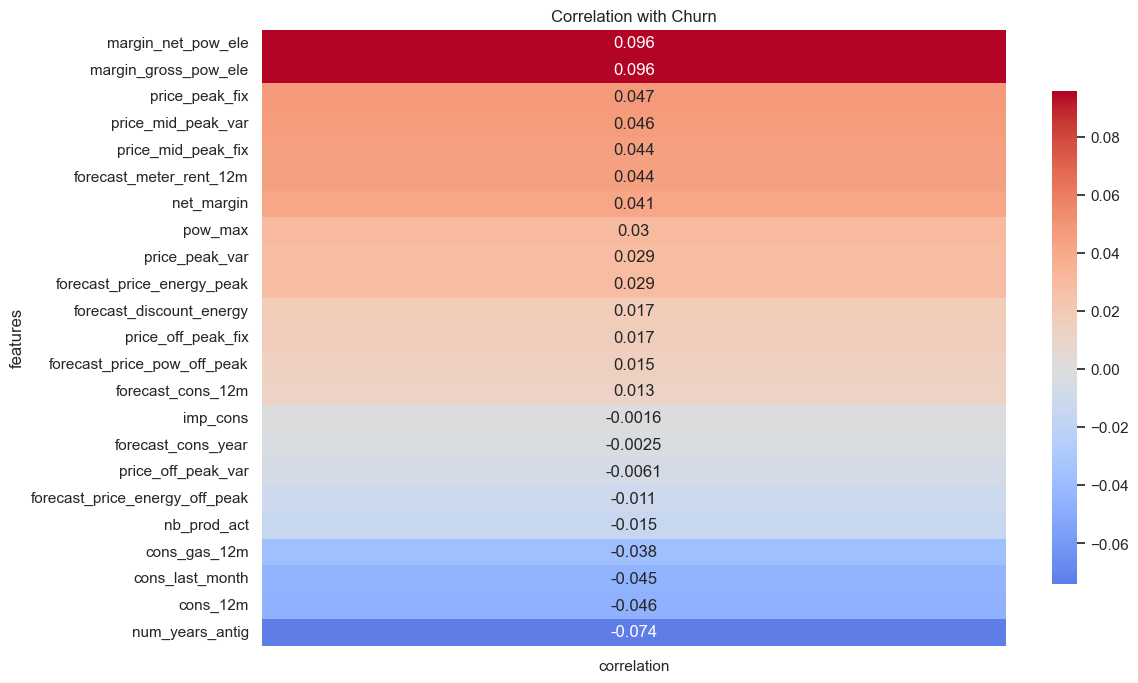

In [15]:
# Correlation matrix
correlation_data = {
    'features': [
        'margin_net_pow_ele', 'margin_gross_pow_ele', 'price_peak_fix',
        'price_mid_peak_var', 'price_mid_peak_fix', 'forecast_meter_rent_12m',
        'net_margin', 'pow_max', 'price_peak_var', 'forecast_price_energy_peak',
        'forecast_discount_energy', 'price_off_peak_fix', 'forecast_price_pow_off_peak',
        'forecast_cons_12m', 'imp_cons', 'forecast_cons_year', 'price_off_peak_var',
        'forecast_price_energy_off_peak', 'nb_prod_act', 'cons_gas_12m',
        'cons_last_month', 'cons_12m', 'num_years_antig'
    ],
    'correlation': [
        0.095820, 0.095774, 0.046852, 0.046120, 0.044446, 0.044257,
        0.041077, 0.030414, 0.029314, 0.029254, 0.017113, 0.016643,
        0.014872, 0.012882, -0.001552, -0.002540, -0.006075, -0.010703,
        -0.014780, -0.037897, -0.045237, -0.045918, -0.074033
    ]
}

# Creating a DataFrame
corr_df = pd.DataFrame(correlation_data)

# Setting the index to features for better visualization
corr_df.set_index('features', inplace=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar_kws={"shrink": .8})
plt.title('Correlation with Churn')
plt.show()

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [16]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

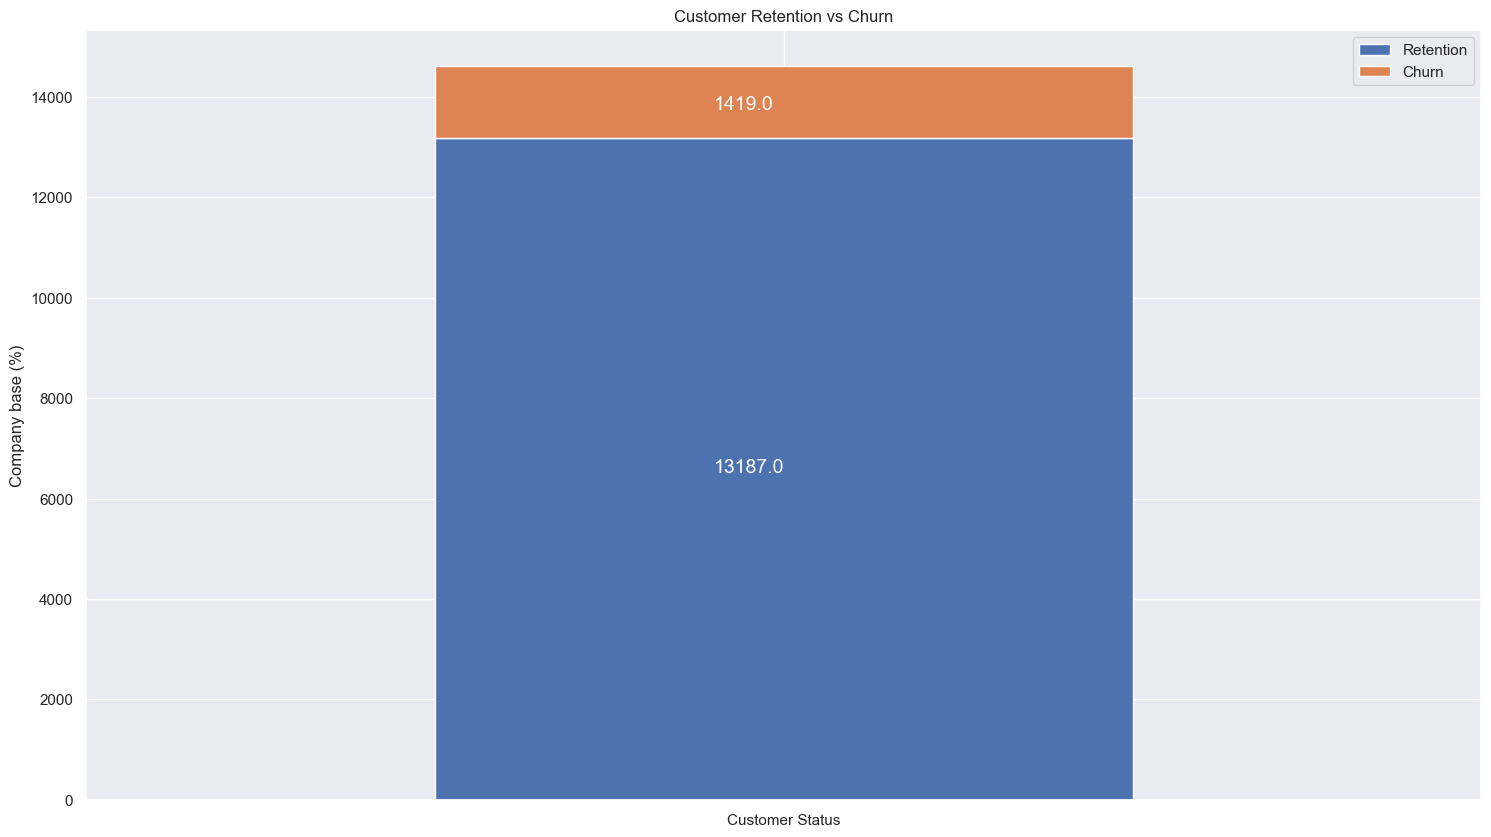

In [17]:
# Count of churned and retained customers
churn_counts = client_df['churn'].value_counts()
churn_df = pd.DataFrame({
    'Retention': [churn_counts[0]], 
    'Churn': [churn_counts[1]]
}, index=['Customer Status'])

# Stacked bar chart
plot_stacked_bars(churn_df, "Customer Retention vs Churn")

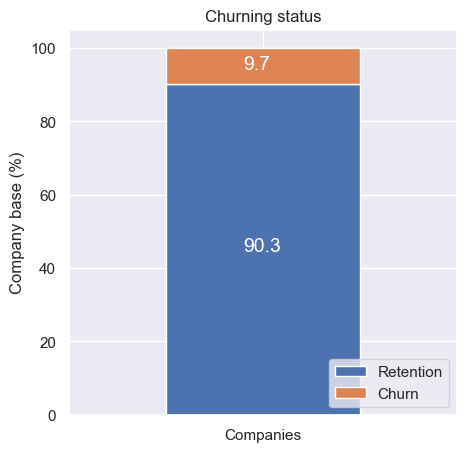

In [18]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

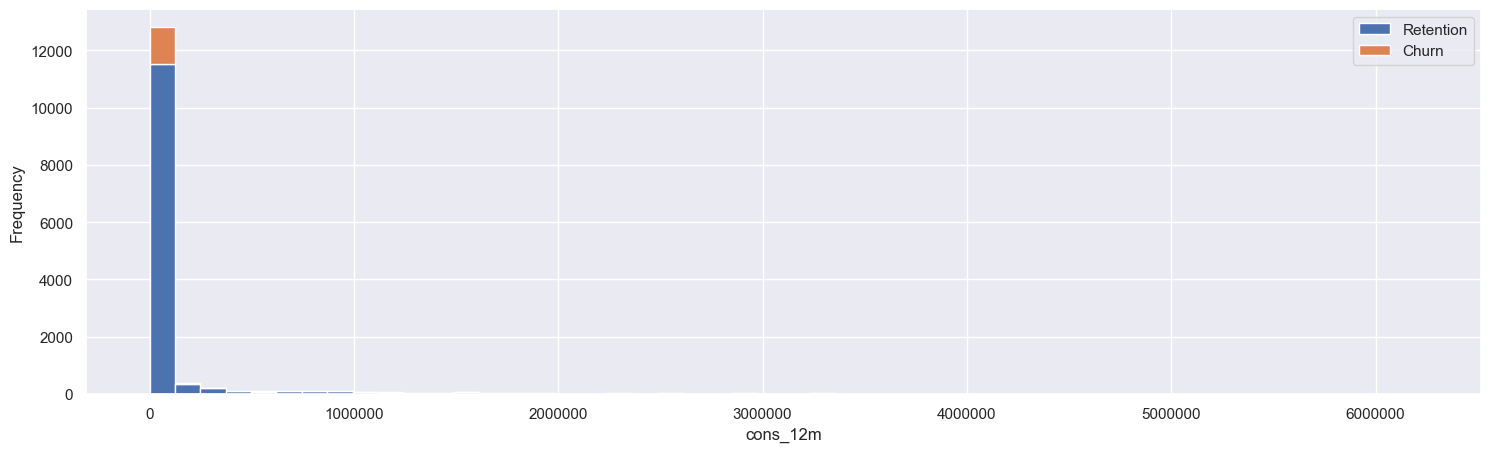

In [19]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

C:\Users\gadas\AppData\Local\Temp\ipykernel_33208\1075491205.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='correlation', y='features', data=top_corr_df, palette='coolwarm')


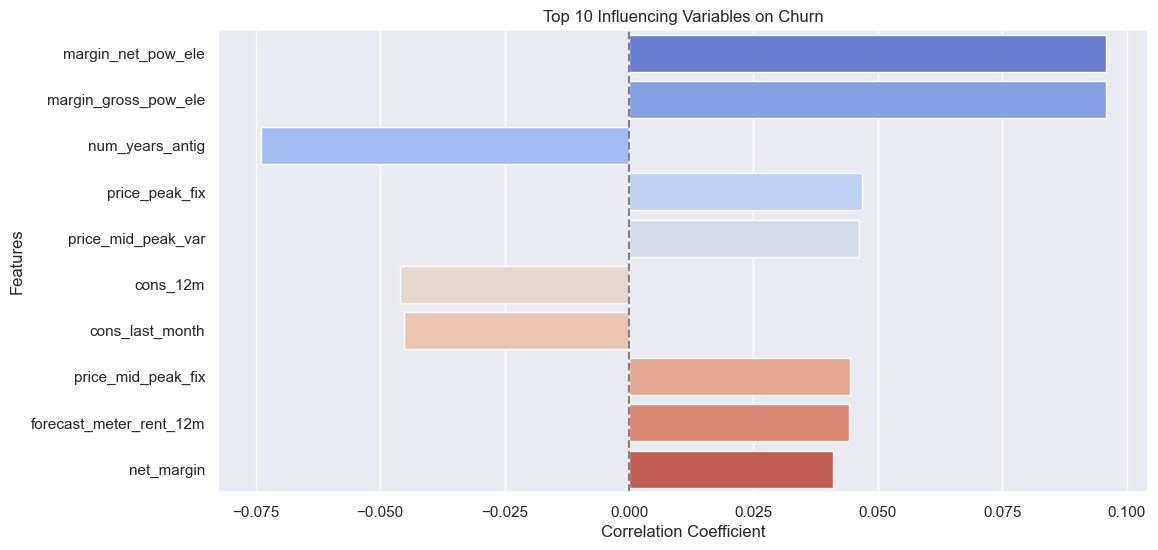

In [20]:
# Sorting by absolute value of correlation for visualization
corr_df['abs_correlation'] = corr_df['correlation'].abs()
sorted_corr_df = corr_df.sort_values(by='abs_correlation', ascending=False)

# Selecting the top 10 influencing variables (both positive and negative)
top_n = 10
top_corr_df = sorted_corr_df.head(top_n)

# Bar Plot for the Most Influencing Variables based on correlation values
plt.figure(figsize=(12, 6))
sns.barplot(x='correlation', y='features', data=top_corr_df, palette='coolwarm')
plt.title(f'Top {top_n} Influencing Variables on Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at 0
plt.show()

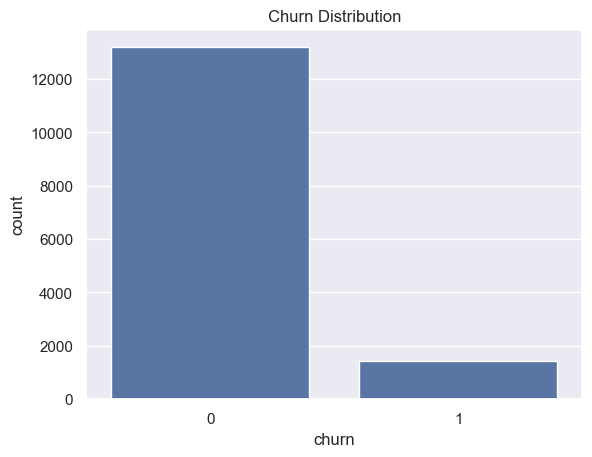

In [22]:
# Countplot for churn variable
sns.countplot(x='churn', data=client_df)
plt.title('Churn Distribution')
plt.show()

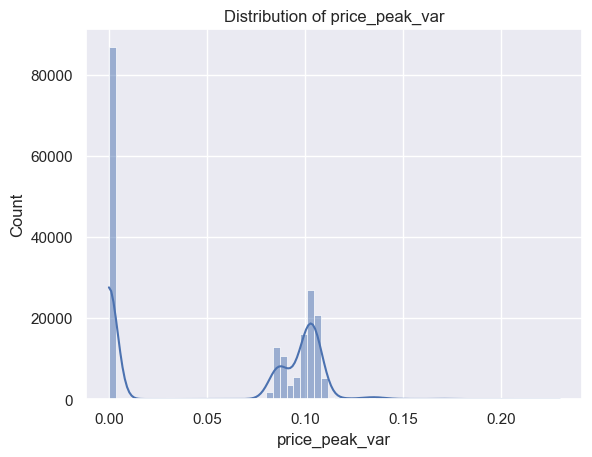

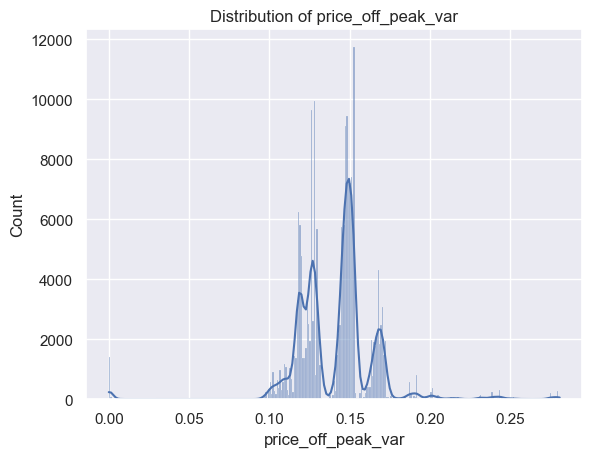

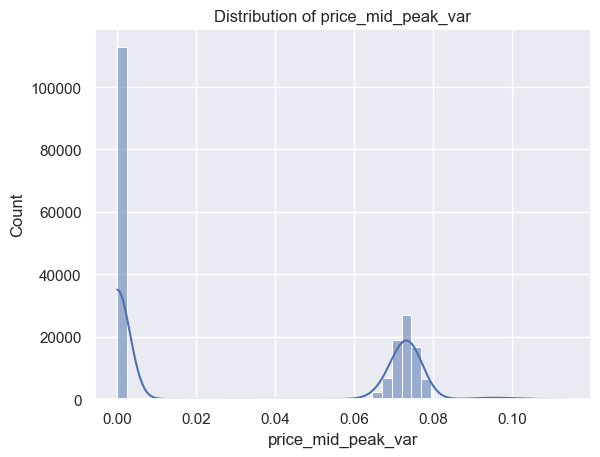

In [26]:
# Histograms for price of energy variables
numerical_vars = ['price_peak_var', 'price_off_peak_var', 'price_mid_peak_var']
for var in numerical_vars:
    sns.histplot(price_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

First Graph (Distribution of price_peak_var): A large portion of the data points cluster around very low values (close to 0.00). This suggests that many observations experience little to no variation in price during peak periods.There is another noticeable cluster around the 0.08-0.10 range. This implies a subset of data experiences moderate price variations. A few observations exhibit higher price variations (up to 0.20), but these are rare, indicating that large price spikes are infrequent.
Second Graph (Distribution of price_off_peak_var): Unlike the peak variation graph, there are very few data points around zero, meaning that most off-peak observations show some degree of price. The majority of the data either shows very low variation or moderate variation (centered around 0.07), with very few instances of high price variation.e fluctuation, rather than remaining constant. A large portion of the data is concentrated between 0.10 and 0.15, indicating that most observations have moderate price variation during off-peak times.
Third Graph (Distribution of price_mid_peak_var): The majority of the data points are concentrated at values close to zero, indicating that for many observations, price variation during mid-peak periods is minimal or non-existent.The majority of the data either shows very low variation or moderate variation (centered around 0.07), with very few instances of high price variation.

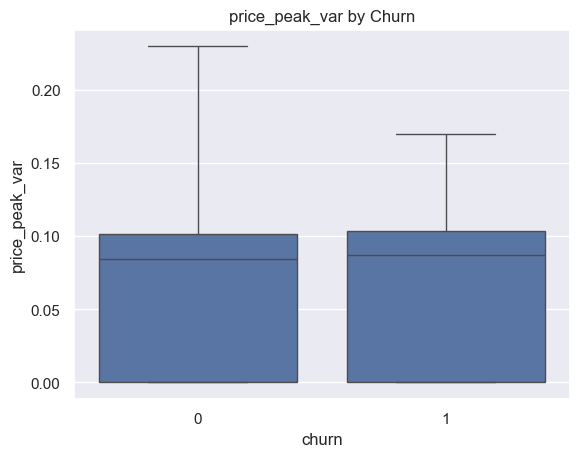

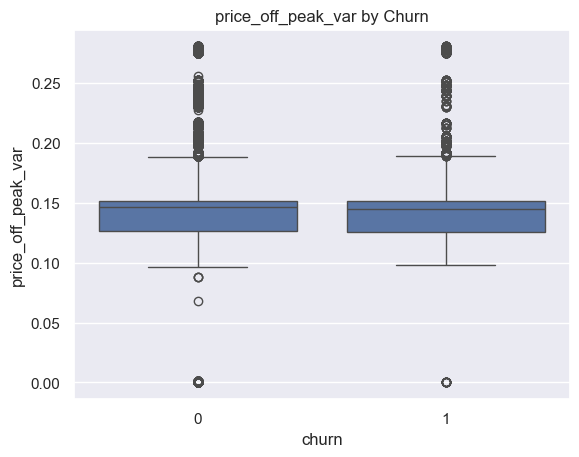

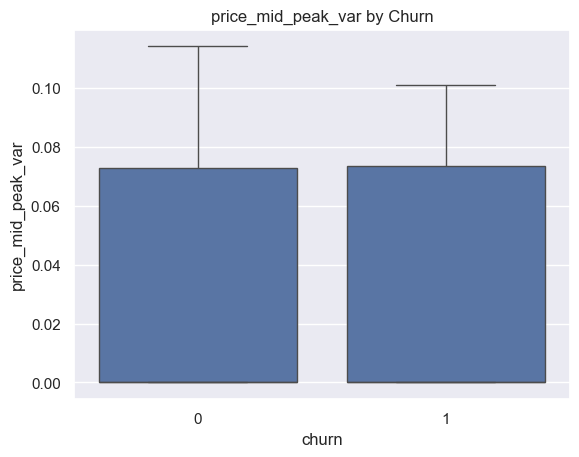

In [27]:
# Boxplots to see distributions by churn - price of energy variables
for var in numerical_vars:
    sns.boxplot(x='churn', y=var, data=merged_data)
    plt.title(f'{var} by Churn')
    plt.show()

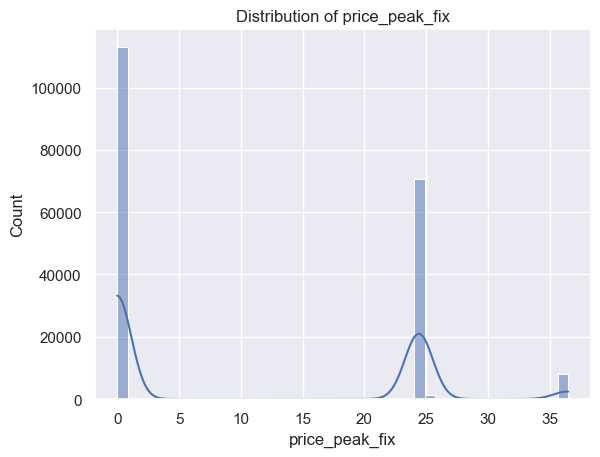

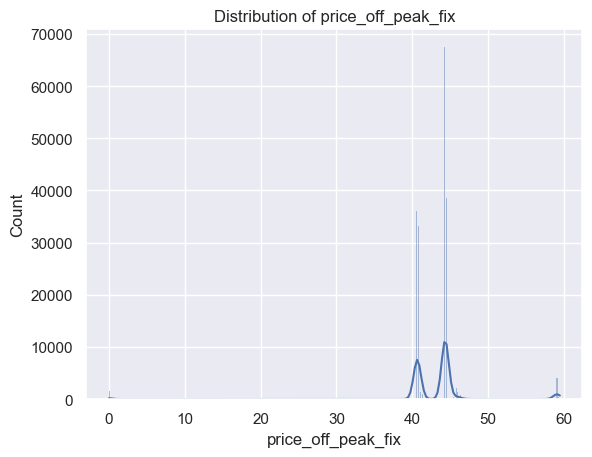

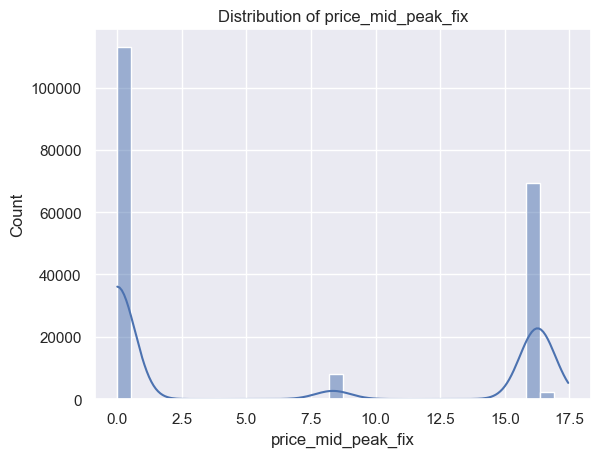

In [29]:
# Histograms for price of power variables
numerical_vars1 = ['price_peak_fix', 'price_off_peak_fix', 'price_mid_peak_fix']
for var in numerical_vars1:
    sns.histplot(price_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

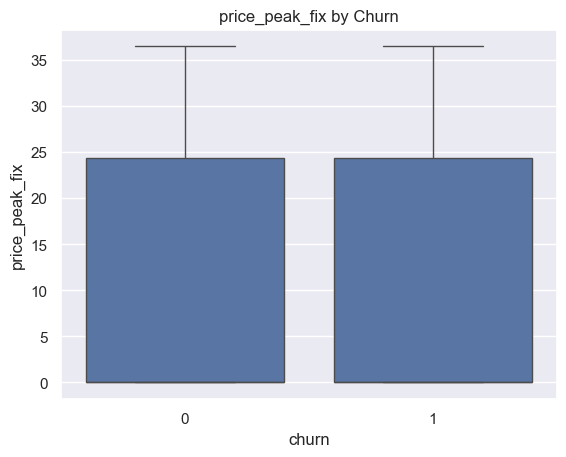

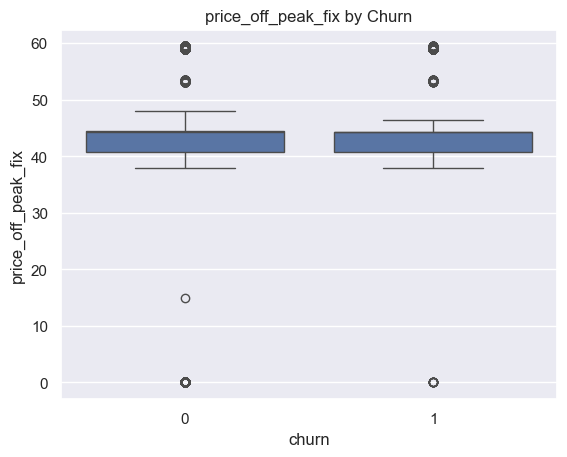

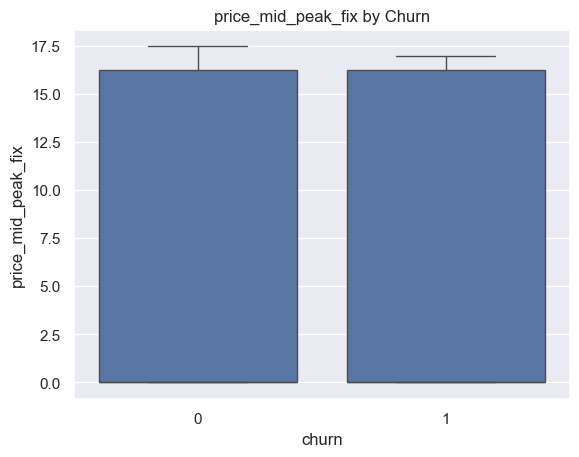

In [30]:
# Boxplots to see distributions by churn - price of power variables
for var in numerical_vars1:
    sns.boxplot(x='churn', y=var, data=merged_data)
    plt.title(f'{var} by Churn')
    plt.show()

C:\Users\gadas\AppData\Local\Temp\ipykernel_33208\3223384125.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=both_service_counts.index, y=both_service_counts.values, palette='coolwarm')


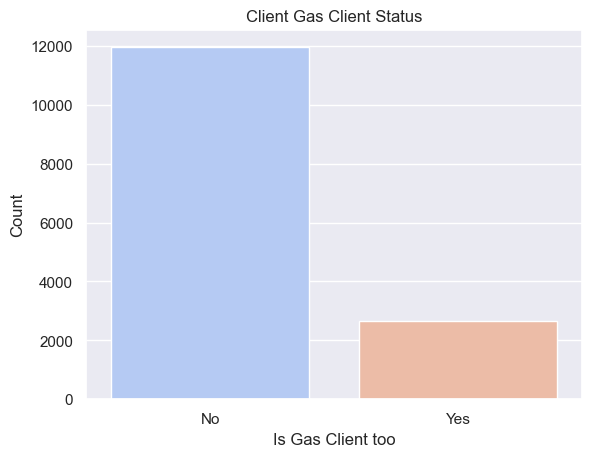

In [31]:
# Count the occurrences of gas clients
both_service_counts = client_df['has_gas'].value_counts()

# Bar chart
sns.barplot(x=both_service_counts.index, y=both_service_counts.values, palette='coolwarm')
plt.title('Client Gas Client Status')
plt.xlabel('Is Gas Client too')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

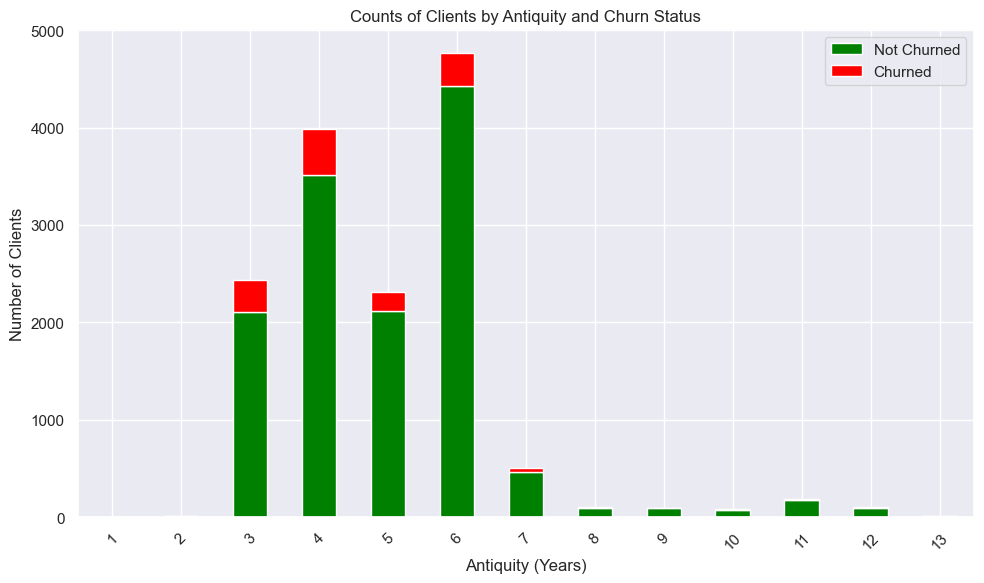

churn               0    1
num_years_antig           
1                   1    0
2                   8    3
3                2104  329
4                3510  472
5                2117  200
6                4430  339
7                 467   42
8                  98    5
9                  91    1
10                 77    4
11                173   12
12                 99   11
13                 12    1


In [32]:
# Count of churned vs not churned customers by antiquity of the client in number of years
count_data = client_df.groupby(['num_years_antig', 'churn']).size().unstack(fill_value=0)

# Plotting
count_data.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))

plt.title('Counts of Clients by Antiquity and Churn Status')
plt.xlabel('Antiquity (Years)')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()
print(count_data)

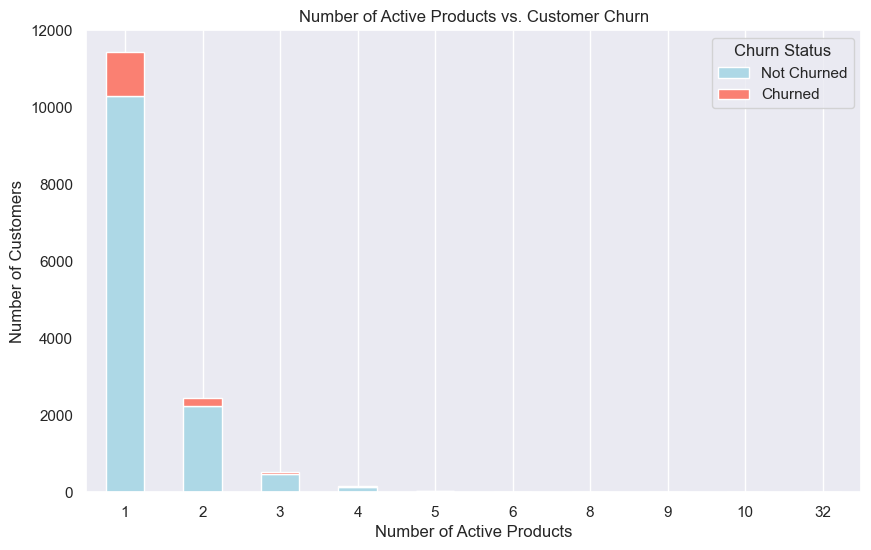

churn            0     1
nb_prod_act             
1            10290  1141
2             2237   208
3              471    52
4              135    15
5               28     3
6                8     0
8                4     0
9               11     0
10               2     0
32               1     0


In [33]:
# Count of churned vs not churned customers by number of active products & services
churn_counts = client_df.groupby(['nb_prod_act', 'churn']).size().unstack(fill_value=0)

# Plotting
churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Number of Active Products vs. Customer Churn')
plt.xlabel('Number of Active Products')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])
plt.grid(axis='y')
plt.show()
print(churn_counts)